Задача 1. (11 баллов)

В известном магазине техники представлено очень много экземпляров различной бытовой техники двух видов: с возможностью подключения к системе "Умный дом" и без такой возможности. Причем, известно, что эти два вида техники представлены в пропорции 1 : 3 соответственно. Случайным образом выбрали 7 экземпляров техники для розыгрыша среди участниц конкурса "Мисс Рукоделье - 2024". Какова вероятность, что среди них не более двух экземпляров с возможностью подключения к системе "Умный дом"?

Подробно распишите решение и обоснуйте выбор распределения для моделирования сюжета задачи. Ответ округлите до трёх знаков.


In [2]:
# Условия задачи соответствуют биномиальному распределению - число успехов к = количество экземпляров техники с "Умным домом", в n = 7 испытаниях
import numpy as np
from scipy.stats import binom
n = 7  # количество испытаний
k = 2  # число успехов 
p = 0.25 #  вероятность успеха (техника с "Умным домом")
x = np.arange(0, n, 1) # возможные значения
o_pmf = binom.pmf(x, n, p)  # массовая функция распределения
s = {}                         
for i in range(n):    
    s[i] = round(o_pmf[i], 10)
print(s)

# cкладываем вероятности Р(0), Р(1) и Р(2)
P = sum(s[i] for i in range(k+1)) # вероятность того, что выберем не более 2-х экземпляров с подключением к системе "Умный дом"
print('вероятность выбора среди 7 экземпляров технике не более 2-х с системой "Умный дом" составляет: ', round((P),3))

# или проще, с помощью кумулятивной функции
k_cdf = binom.cdf(x, n, p)  
print('вероятность ', round(k_cdf[k],3))


{0: 0.1334838867, 1: 0.3114624023, 2: 0.3114624023, 3: 0.173034668, 4: 0.0576782227, 5: 0.0115356445, 6: 0.0012817383}
вероятность выбора среди 7 экземпляров технике не более 2-х с системой "Умный дом" составляет:  0.756
вероятность  0.756


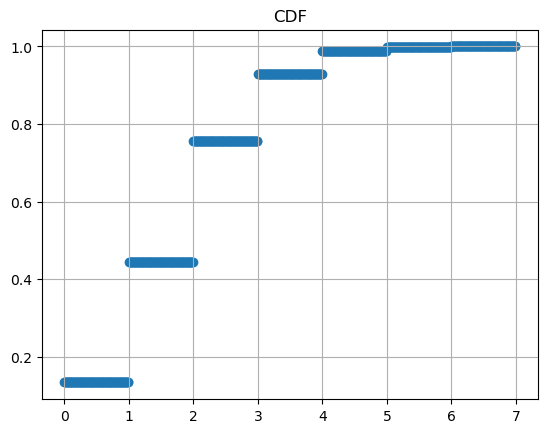

In [3]:
import matplotlib.pyplot as plt
x = np.arange(0, n, 0.01)
plt.scatter(x, binom.cdf(x, n, p)) # кумулятивная функция
plt.title('CDF')
plt.grid() 
plt.show()

Задача 2 (30 баллов)

Дан закон распределения количества публикаций в которой группе телеграм-каналов:
Найдите пропущенную вероятность для X = 0, математическое ожидание и дисперсию. Решите задачу "вручную" и с помощью python.

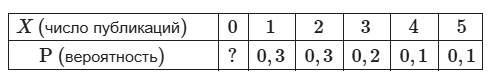


In [6]:
import numpy as np
import statistics

# решение "вручную"
# Сумма всех вероятностей = 1
# Р(х0) = 1 - Р(х1) - Р(х2) - Р(х3) - Р(х4) - Р(х5)
# Р(х0) = 0
# mатематическое ожидание = сумма произведений значений на соответствующие вероятности
# М = х0*Р(х0) + х1*Р(х1) + х2*Р(х2) + х3*Р(х3) +х4*Р(х4) + х5*Р(х5)
M = 0*0 + 1*0.3 + 2*0.3 + 3*0.2 + 4*0.1 + 5*0.1
print('математическое ожидание = ', M)

# дисперсия = среднее квадратичное отклонение от среднего значения:
# математическое ожидание квадрата случайной величины
# M2 = х0**2*Р(х0) + х1**2*Р(х1) + х2**2*Р(х2) + х3**2*Р(х3) +х4**2*Р(х4) + х5**2*Р(х5)
M2 = 0**2*0 + 1**2*0.3 + 2**2*0.3 + 3**2*0.2 +4**2*0.1 + 5**2*0.1
#D = M2 - M**2
D = M2 - M**2 
print('дисперсия = ', round(D,2))

print('\nРешение c помощью Python')
x = np.array([0, 1, 2, 3, 4, 5])
p = np.array([0, 0.3, 0.3, 0.2, 0.1, 0.1])

P0 = 1 - sum(p)
print('вероятность для x = 0:', P0)

Mp = np.sum(x * p)
print('Математическое ожидание:', Mp)


# Дисперсия
Mp2 = np.sum((x**2) * p)
Var_x = Mp2 - Mp**2
print('Дисперсия:', round(Var_x,2))

математическое ожидание =  2.4
дисперсия =  1.64

Решение c помощью Python
вероятность для x = 0: 0.0
Математическое ожидание: 2.4
Дисперсия: 1.64


Задача 3 (25 баллов)

Компания приобрела 10 000 новых ноутбуков. Вероятность поломки одного ноутбука в течение месяца равна 0,0002. Предполагается, что поломки отдельных ноутбуков происходят независимо друг от друга.

Вопрос 1. Найдите вероятность того, что за месяц сломается ровно 1 ноутбук. Решение объясните. (5 баллов)

Вопрос 2. Компания планирует ввести программу расширенной гарантии, по которой она будет бесплатно ремонтировать или заменять ноутбуки, сломавшиеся в течение месяца. Если общее количество поломок за месяц превысит 5 ноутбуков, компания понесет значительные дополнительные расходы.

а) Найдите вероятность того, что за месяц сломается более 5 ноутбуков.Решение объясните (10 баллов)

б) Если стоимость ремонта или замены одного ноутбука составляет 500 долларов, вычислите математическое ожидание общих расходов компании на поломки за один месяц. (10 баллов)

In [9]:
# используем распределения Пуассона, т.к. имеем дело с редким событием в большом количестве испытаний 

from scipy.stats import poisson
n = 10000  # количество ноутбуков
p = 0.0002 # вероятность поломки
mu = n*p
x = np.arange(0, 6, 1) # считаем вероятности для 6 возможных исходов = сломались (0,1,2,3,4 и 5) ноутбуков
o_pmf = poisson.pmf(x, mu)  # массовая функция распределения
s = {}  # результат записываем в словарь
for i in range(6):
    s[i] = round(o_pmf[i], 5)
print(s)
print('\nвероятность того, что сломается 1 ноутбук составляет: ', round(s[1],4))

# вероятность поломки более 5 ноутбуков = 1 - вероятность поломки 0,1,2,3,4 или 5 ноутбуков
k = 6
P = sum(s[i] for i in range(k)) # вероятность того, что сломается от 0 до 5 ноутбуков включительно
print(f'вероятность того, что сломаются {k-1} ноутбуков или меньше составляет: ', round((P),4))
print(f'вероятность того, что сломаются больше {k-1} ноутбуков составляет:     ', round((1-P),4))

# кумулятивная функция распределения
k_pmf = poisson.cdf(x, mu)  
print('вероятность, прассчитанная с помощью кумулятивной функция распределения:  ', round((1-k_pmf[5]),4))

# Математическое ожидание общих расходов компании на поломки за один месяц
cost1 = 500 #  стоимость ремонта или замены одного ноутбука
print('\nОжидаемые расходы на ремонт в месяц:  ', n*p*cost1)

{0: 0.13534, 1: 0.27067, 2: 0.27067, 3: 0.18045, 4: 0.09022, 5: 0.03609}

вероятность того, что сломается 1 ноутбук составляет:  0.2707
вероятность того, что сломаются 5 ноутбуков или меньше составляет:  0.9834
вероятность того, что сломаются больше 5 ноутбуков составляет:      0.0166
вероятность, прассчитанная с помощью кумулятивной функция распределения:   0.0166

Ожидаемые расходы на ремонт в месяц:   1000.0
